# Close price prediction on TESLA stocks.

## Documentation for the research don to chos algorithem.
https://github.com/kimpal/Dave3625-1_21H_intro_to_AI/blob/a1f7e3b184f2d96a822f2b869ea993ce75948ee6/Assignment2/README.md

### stepps preformed To Train the algorithem and get a model:

the necesery imports

In [1]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

1. get the data set. them gett info from the data set

In [2]:
#read the file
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.shape

(2845, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB


2. do som futer enginering on the data to preper it for the algorithem

In [6]:
#converts Date to ordinal
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] =  df['Date'].map(dt.datetime.toordinal)

Remove the un nessesery data

In [7]:
# Keep only the 'Close' Value' ,'Date' and the index
df = df[['Date','Close']]

3. chec that the cange is done

In [8]:
df.head()

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2845 non-null   int64  
 1   Close   2845 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.6 KB


  make a plot just to visualiz the data

Text(0, 0.5, 'close price USD ($)')

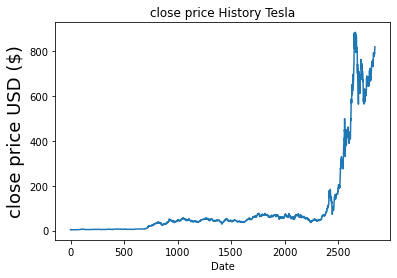

In [10]:
#Visualize the close price data
#plt.figure(figsize=(16,8)) # uncoment to get the figur in desiered size
plt.title('close price History Tesla')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('close price USD ($)', fontsize=18)

4.Splitting data into testset before training the algorithem.
TimeSeriesSplit had ben mor suitable but for simplisecy I just used the train_test_split.

In [11]:
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])
# splitt the set in traing and testing set
#test_size = 0.33 tell the function that 1/3 of valuess should beput in test arrey
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

5. training of the model

In [12]:
DTR = DecisionTreeRegressor()#definerer algoritmen og lagrer den i variabelen DTR

In [13]:
#Now lets train the algorithem
DTR.fit(X_train, y_train) #Train the model on X_train, y_train X="Date", y="Close"

DecisionTreeRegressor()

5.1.test the model on the train data

In [14]:
#make an prediction on the trained data and evaluate it whit MSE
Y_pred = DTR.predict(X_train)#make prediction
print("MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE
#godd MSE score on the train data

MSE = 0.0


5.2. lets test the model for inpt X "Date" inpt for index 2 wher the Y walue "Close" price is 4.392 ($)

In [15]:
#Lets manually check with a row  from the  Tesla.csv dataset (dt) 
#her we chec whit index 2 wher Date = 733954 = 2010-07-01
DTR.predict([[733954]]) #Expected output = 4.392

array([4.392])

6. the real test prediction on test data x_test

In [16]:
#make prediction on test dataset
Y_pred = DTR.predict(X_test)#make prediction on X_test
#Calculate MSE to xhec the preformence on test data
print("MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))# evaluate preformens whit MSE

MSE = 64.78036347160592


The MSE score are prety good but lets chec if the model actuly could predict on som newer data in the future.
Lets chec the model whit New Data.

In [17]:
#testing on un sen data(new data from TSL_Test.csv) Data set is in the root folder off this repo
DTR.predict([[738085]]) 
#Expected output = 909.679993 (actual value)
#the data is from data whit Date = 2021-10-22 = 738085

array([818.320007])

the prediction is not so bade baset on that the price the earlier days was aroudn the prediction
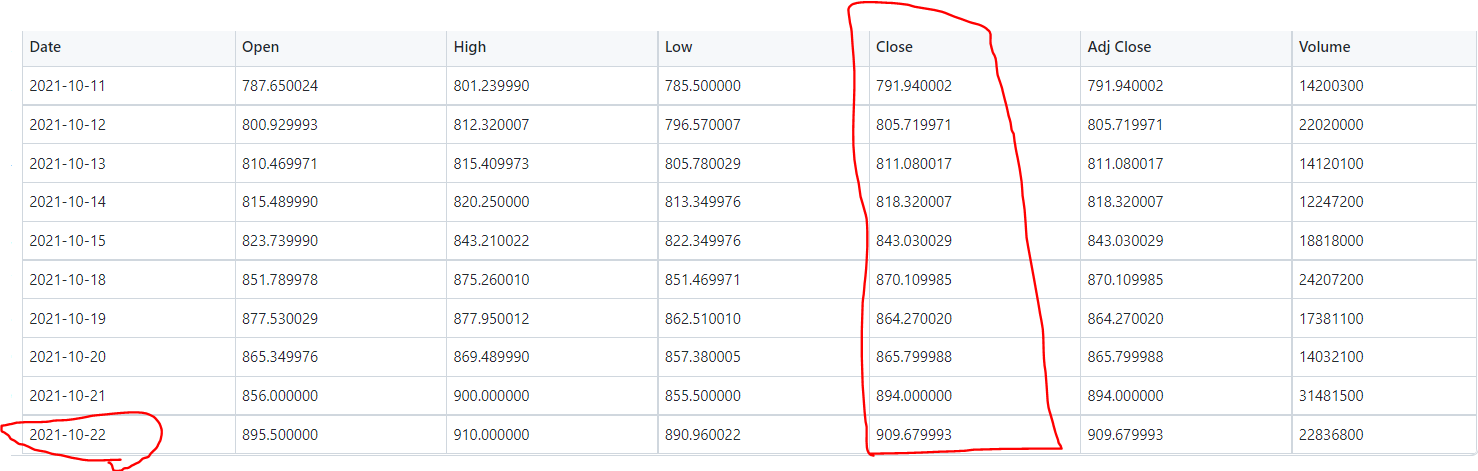

7. most licli that the model is ower trained so that it is not such godd at other stocs or long time prediction.

8. future steps would be to save the model or try to train it on diferent data sizes to se how that changes the preformece

In [18]:

#prepper to save the models
#models = []

In [19]:
#function to save the model
#import pickle
#save the model to disk
#filename = 'model.sav'
#pickle.dump(modells[0], oppen(filename, 'wb'))

########################################
#load the model again, and test to se if it works.
#loade_model = pickle.load(oppen(filename, 'rb'))
#loade_model.predict([[]]) #toordinal